# **Read The Data**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('Dataset.csv')

In [3]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df["price"].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


# **Data Cleaning**

In [8]:
df.isnull().sum().sort_values(ascending=False)

,0
last_review,10052
reviews_per_month,10052
host_name,21
name,16
neighbourhood_group,0
neighbourhood,0
id,0
host_id,0
longitude,0
latitude,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df=df.drop_duplicates()

In [11]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

df = df.dropna(subset=["name", "host_name"])


In [12]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")



In [13]:
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  number_

In [15]:
df = df[df["price"] <= 1000]


In [16]:
upper_limit = df["price"].quantile(0.99)
df = df[df["price"] <= upper_limit]


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48158 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48158 non-null  int64         
 1   name                            48158 non-null  object        
 2   host_id                         48158 non-null  int64         
 3   host_name                       48158 non-null  object        
 4   neighbourhood_group             48158 non-null  object        
 5   neighbourhood                   48158 non-null  object        
 6   latitude                        48158 non-null  float64       
 7   longitude                       48158 non-null  float64       
 8   room_type                       48158 non-null  object        
 9   price                           48158 non-null  int64         
 10  minimum_nights                  48158 non-null  int64         
 11  number_

In [18]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.815800e+04,4.815800e+04,48158.000000,48158.000000,48158.000000,48158.000000,48158.000000,38429,48158.000000,48158.000000,48158.000000
mean,1.900653e+07,6.737706e+07,40.728846,-73.951829,134.790876,6.954566,23.486087,2018-10-04 20:17:40.823857152,1.099546,7.097948,111.665559
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.474068e+06,7.797761e+06,40.689910,-73.982790,69.000000,1.000000,1.000000,2018-07-09 00:00:00,0.040000,1.000000,0.000000
50%,1.966332e+07,3.067034e+07,40.722750,-73.955360,104.000000,2.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,43.000000
75%,2.911758e+07,1.074344e+08,40.763210,-73.935800,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.610000,2.000000,223.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,650.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.097204e+07,7.845588e+07,0.054682,0.046193,95.845337,19.823194,44.768865,NaN,1.603110,32.863849,131.092515


In [19]:
df["price"].describe()


,price
count,48158.000000
mean,134.790876
std,95.845337
min,0.000000
25%,69.000000
50%,104.000000
75%,175.000000
max,650.000000


# **EDA**

In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.815800e+04,4.815800e+04,48158.000000,48158.000000,48158.000000,48158.000000,48158.000000,38429,48158.000000,48158.000000,48158.000000
mean,1.900653e+07,6.737706e+07,40.728846,-73.951829,134.790876,6.954566,23.486087,2018-10-04 20:17:40.823857152,1.099546,7.097948,111.665559
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.474068e+06,7.797761e+06,40.689910,-73.982790,69.000000,1.000000,1.000000,2018-07-09 00:00:00,0.040000,1.000000,0.000000
50%,1.966332e+07,3.067034e+07,40.722750,-73.955360,104.000000,2.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,43.000000
75%,2.911758e+07,1.074344e+08,40.763210,-73.935800,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.610000,2.000000,223.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,650.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.097204e+07,7.845588e+07,0.054682,0.046193,95.845337,19.823194,44.768865,NaN,1.603110,32.863849,131.092515


In [21]:
df["price"].agg(["mean", "median", "min", "max"])


,price
mean,134.790876
median,104.000000
min,0.000000
max,650.000000


In [22]:
avg_price_neighbourhood = (
    df.groupby("neighbourhood_group")["price"]
    .mean()
    .sort_values(ascending=False)
)

avg_price_neighbourhood


,price
neighbourhood_group,
Manhattan,168.102596
Brooklyn,114.810736
Queens,93.568846
Staten Island,92.595109
Bronx,82.660517


In [23]:
avg_price_room = (
    df.groupby("room_type")["price"]
    .mean()
    .sort_values(ascending=False)
)

avg_price_room


,price
room_type,
Entire home/apt,184.811769
Private room,82.580349
Shared room,63.460469


In [24]:
df["room_type"].value_counts()


,count
room_type,
Entire home/apt,24810
Private room,22197
Shared room,1151


# **Visualization**

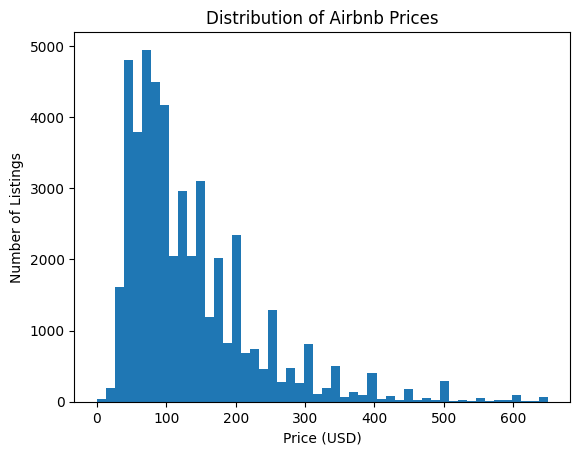

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["price"], bins=50)
plt.xlabel("Price (USD)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Airbnb Prices")
plt.show()


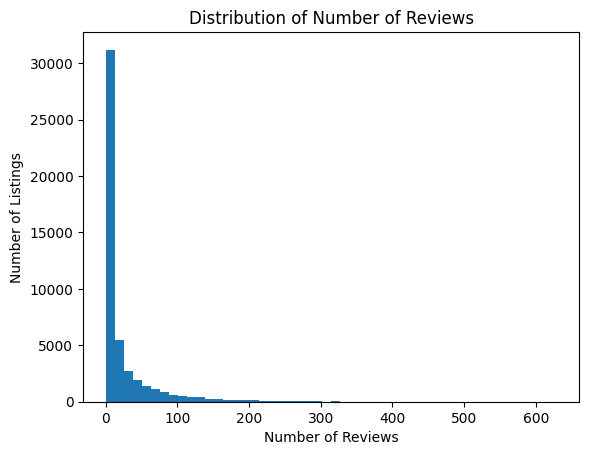

In [26]:
plt.figure()
plt.hist(df["number_of_reviews"], bins=50)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Listings")
plt.title("Distribution of Number of Reviews")
plt.show()


<Figure size 640x480 with 0 Axes>

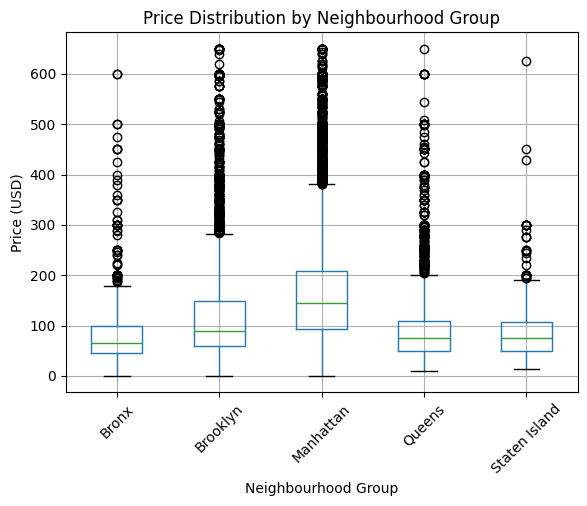

In [27]:
plt.figure()
df.boxplot(column="price", by="neighbourhood_group", rot=45)
plt.title("Price Distribution by Neighbourhood Group")
plt.suptitle("")  # removes default pandas subtitle
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (USD)")
plt.show()


<Figure size 640x480 with 0 Axes>

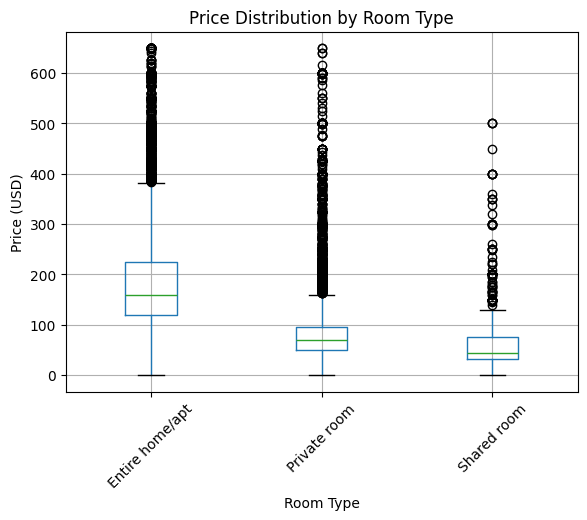

In [28]:
plt.figure()
df.boxplot(column="price", by="room_type", rot=45)
plt.title("Price Distribution by Room Type")
plt.suptitle("")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.show()


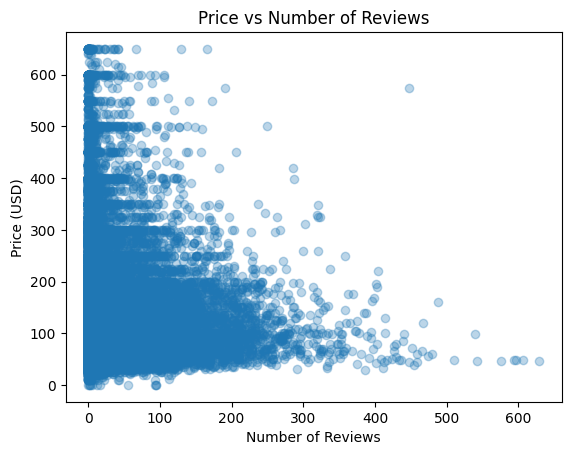

In [29]:
plt.figure()
plt.scatter(df["number_of_reviews"], df["price"], alpha=0.3)
plt.xlabel("Number of Reviews")
plt.ylabel("Price (USD)")
plt.title("Price vs Number of Reviews")
plt.show()


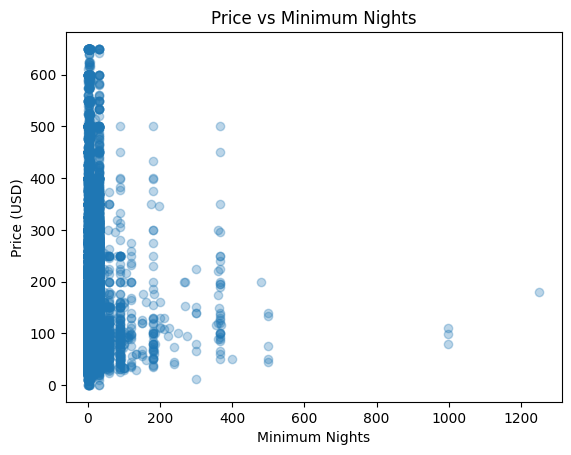

In [30]:
plt.figure()
plt.scatter(df["minimum_nights"], df["price"], alpha=0.3)
plt.xlabel("Minimum Nights")
plt.ylabel("Price (USD)")
plt.title("Price vs Minimum Nights")
plt.show()


In [31]:
corr_matrix = df[
    ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]
].corr()

corr_matrix


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.022241,-0.050454,-0.048062,0.101916
minimum_nights,0.022241,1.000000,-0.081612,-0.127529,0.145829
number_of_reviews,-0.050454,-0.081612,1.000000,0.588902,0.176299
reviews_per_month,-0.048062,-0.127529,0.588902,1.000000,0.168006
availability_365,0.101916,0.145829,0.176299,0.168006,1.000000


# **Geographical Analysis**

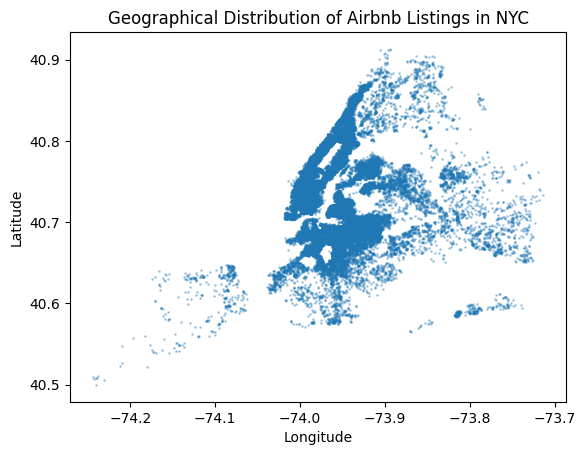

In [32]:
plt.figure()
plt.scatter(
    df["longitude"],
    df["latitude"],
    s=1,
    alpha=0.3
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Airbnb Listings in NYC")
plt.show()


In [33]:
import folium

# Center map on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

for _, row in df.sample(1000).iterrows():  # sample to keep it fast
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        popup=f'${row["price"]}',
        fill=True
    ).add_to(nyc_map)

nyc_map


In [34]:
from IPython.display import display, HTML


In [35]:
display(HTML("""
<div style="
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 34px;
    font-weight: 600;
    color: #2C2C2C;
    text-align: center;
    line-height: 1.4;
    margin: 30px auto;
">
    <span style="font-size: 42px; font-weight: 700;">Ashfiruna Zaman</span><br>
    <span style="font-size: 22px; color: #6E6E6E;">
        Data Analyst · MS in Computer Information Technology<br>
        Purdue University
    </span>
</div>
"""))